<a href="https://colab.research.google.com/github/akkinepally/Analyze-Model-interpretability-using-SHAP/blob/main/alekhya_akkinepally_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI 
**Heart Disease Prediction**:
######Predict if a heart disease is present or not


**Meta Data:**
age: Age in year
sex: 1 = male, 0 = female
cp: Chest pain type
trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholesterol in mg/dl
fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results
thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: The slope of the peak exercise ST segment
ca: Number of major vessels (0-4) colored by fluoroscopy
thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found
target: 1 = Heart disease present, 0 = Heart disease not present

## Import Libraries

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
! pip install shap
import shap
from imblearn.over_sampling import SMOTE

     |████████████████████████████████| 327kB 8.6MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463906 sha256=f65ccd81c1bc687c5e4318341ecb1dd8aa178a429bf49e95acc9a32d188d089d
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
# loading the data 
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

In [ ]:

#heart_data = heart_data.drop(['fbs'], axis = 1)
heart_data['age'].value_counts()

57    15
58    13
54    10
60    10
41     9
59     9
52     9
62     8
67     8
53     7
61     7
63     7
64     6
65     6
45     6
44     6
43     6
42     6
51     6
48     4
50     4
55     4
56     4
66     4
68     4
35     3
47     3
46     3
69     3
71     3
40     3
39     3
38     3
49     2
70     2
37     2
34     1
77     1
76     1
29     1
Name: age, dtype: int64

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   restecg   212 non-null    int64  
 6   thalach   212 non-null    int64  
 7   exang     212 non-null    int64  
 8   oldpeak   212 non-null    float64
 9   slope     212 non-null    int64  
 10  ca        212 non-null    int64  
 11  thal      212 non-null    int64  
 12  target    212 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 21.7 KB


## Separate the Input and Target Features of the data

In [ ]:
y = heart_data['target']
x = heart_data.iloc[:,0:12]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   restecg   212 non-null    int64  
 6   thalach   212 non-null    int64  
 7   exang     212 non-null    int64  
 8   oldpeak   212 non-null    float64
 9   slope     212 non-null    int64  
 10  ca        212 non-null    int64  
 11  thal      212 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 20.0 KB


## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Scale your data if required

In [ ]:

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

In [ ]:

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


## Build a Logistic Regression Model on train set

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Evaluate the model using F1 Score

In [ ]:
y_train_pred = logisticRegr.predict(x_train)
from sklearn.metrics import accuracy_score,f1_score
#train 
print(accuracy_score(y_train,y_train_pred)*100)
print(f1_score(y_train,y_train_pred)*100)
y_test_pred = logisticRegr.predict(x_test)
print(accuracy_score(y_test,y_test_pred)*100)
print(f1_score(y_test,y_test_pred)*100)

84.90566037735849
86.20689655172413
84.90566037735849
87.0967741935484


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')
#test_data = scaler.transform(test_data)
test_data = test_data.drop(['fbs'], axis = 1)
y_pred = logisticRegr.predict(test_data)
result_df = pd.DataFrame()
result_df['prediction'] = y_pred
result_df.reset_index(drop=True, inplace=True)
result_df.to_csv('sample_submission.csv', index = False)

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [ ]:
explainer = shap.LinearExplainer(logisticRegr, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
shap_values[0]

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


array([ 0.07246198, -0.28015903,  1.14969393, -0.26748029, -0.01420019,
       -0.43803794,  0.57241689,  0.35356104,  0.60100592,  0.32721607,
        0.42484585,  0.38803305])

## Plot a SHAP force plot for the first row of test data.

In [ ]:
#heart diseases
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[0], x_test.iloc[0],
    feature_names=x_test.columns
)

In [ ]:
# no heart disesases
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[5], x_test.iloc[5],
    feature_names=x_test.columns
)

These are for particular patients 

- In the first plot it describes what are the features that help in predicted if there would be a heart disease.
1)High thalach that is the heart rate is high which would give a heart disease
2)The slope of the peak exercise ST segment is high 
3) cp : If the chest pain type is 2


- In the second plot it describes the features that contribute to no heart disease:
1)CA : Number of major vessels (0-4) colored by fluoroscopy is high 
2) oldpeak: ST depression induced by exercise relative to rest should be high 
3) There should be no chest pain 

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values, x_test,
    feature_names=x_test.columns
)

In this plot we are looking into a glbal interpretation and when you hover over the graph you would know what are the features and what value of those features have led to the predictions.

## Plot a SHAP summary plot using all the features in the data

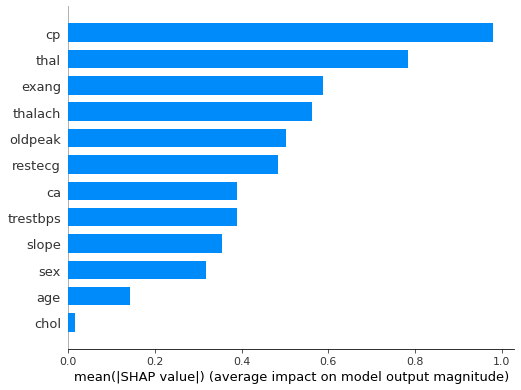

In [ ]:

shap.initjs()
shap.summary_plot(shap_values, 
                  x_test, plot_type="bar")

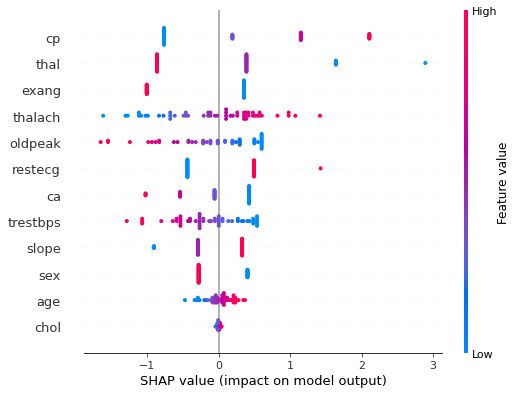

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

## Inferences from the generated plot.
- cp, thal, exang, thalach and old peak are the top features which would help in prediction of a heart disease.

- chol, age sex and slope are the features which have low impact

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

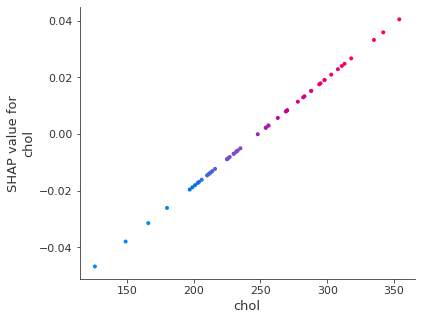

In [ ]:
shap.initjs()
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=x_test)

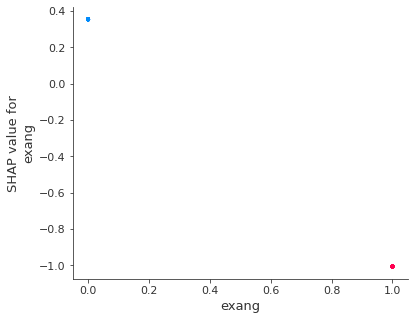

In [ ]:
shap.initjs()
shap.dependence_plot(ind='exang', interaction_index='exang',
                     shap_values=shap_values, 
                     features=x_test)

## Inferences from the generated plot.
The dependency plot show a linear graph which mean if the chol rate is low there is less impact and of it is high it means there could be a heart disesase